# Спрос на рейсы авиакомпании

### Задача

Понять предпочтения пользователей, покупающих билеты на разные направления.

Предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

Работаем со следующими данными:

**query_1.csv** —  датасет, где содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — датасет, где содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

Импортируем файлы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
query1 = pd.read_csv('/datasets/query_1.csv')
query3 = pd.read_csv('/datasets/query_3.csv')

Изучим данные в них

In [2]:
display(query1.head(3))
display(query3.head(3))

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290


Проверим данные на корректность

In [3]:
query1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


>Вывод:<br>
В таблице query1 колонка model имеет тип "object", колонка flights_amount имеет тип "int64", ошибок нет

In [4]:
query3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


>Вывод:<br>
В таблице query3 колонка city имеет тип "object", колонка average_flightst имеет тип "float64", ошибок нет

Выберем топ-10 городов по количеству рейсов

In [5]:
display(query3.sort_values(by = 'average_flights', ascending = False).head(10))

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


>Вывод:<br>
Москва сильно опережает остальные города по количеству ежедневныъ рейсов

Построим графики: 

 -модели самолётов и количество рейсов<br> 
 -города и количество рейсов<br>
 -топ-10 городов и количество рейсов<br>

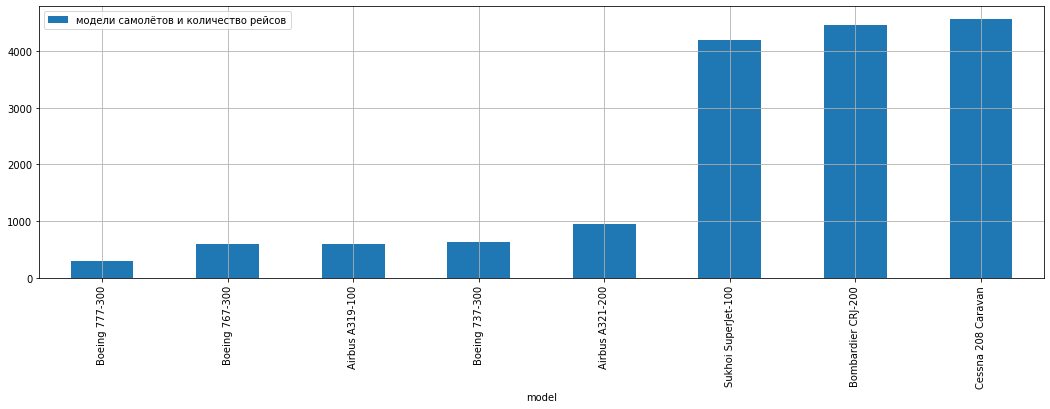

In [6]:
query1.sort_values(by = 'flights_amount').plot(kind = 'bar',x = 'model',y = 'flights_amount', figsize = (18,5), grid = True,\
                                               label = 'модели самолётов и количество рейсов', legend = True)
plt.show()

>Вывод:<br>
Больше всего рейсов совершается самолётами средней размерности, а также малой(Cesna 208, видимо, бизнес-авиация)

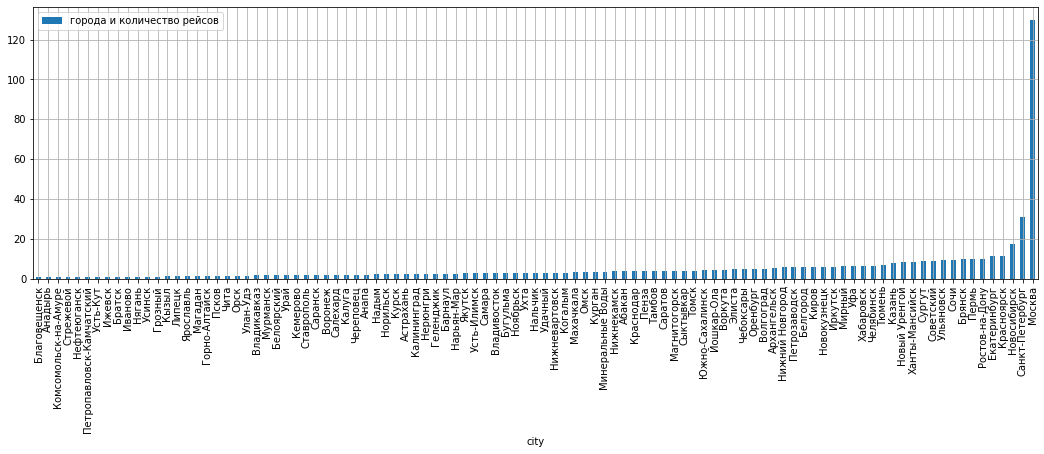

In [7]:
query3.sort_values(by = 'average_flights').plot(kind = 'bar',x = 'city',y = 'average_flights', figsize = (18,5), grid = True,\
                                               label = 'города и количество рейсов', legend = True)
plt.show()

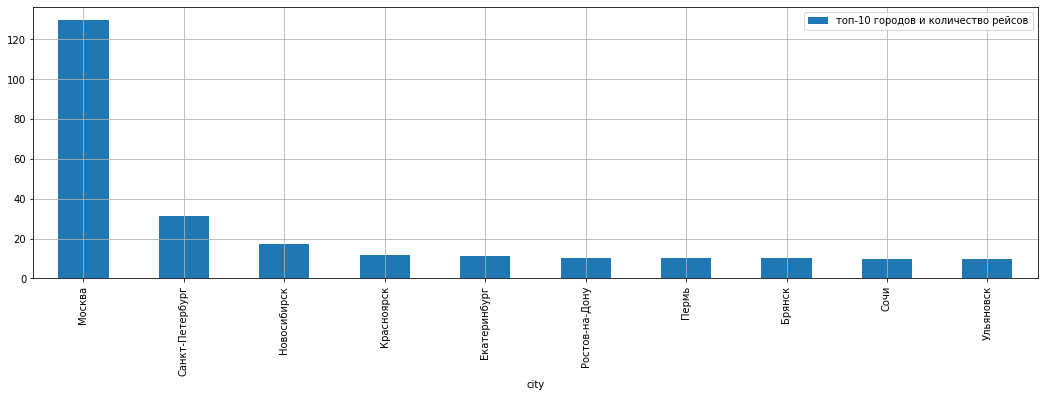

In [8]:
query3.sort_values(by = 'average_flights', ascending = False).head(10).plot(kind = 'bar',x = 'city',y = 'average_flights', figsize = (18,5), grid = True,\
                                               label = 'топ-10 городов и количество рейсов', legend = True)
plt.show()

## Общий вывод

Москва явный лидер в объёме пассажирских авиаперевозок, но для подтверждения влияния фестиваля в городе Москва на количество купленных билетов информации недостаточно, предположительно объем дополнительных билетов не настолько велик, чтобы изменить среднюю цифру